In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 41, 3
factors = [np.random.randn(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += np.random.randn(*data.shape) # add noise

In [5]:
results = tt.fit_ensemble(data, range(1, 9), replicates=3, method=tt.cp_crossval, p_holdout=.5)

Optimizing rank-1 models.
   3/3 converged, min error = 0.8832, max error = 0.9147, mean error = 0.8937, time to fit = 0.3636s
Optimizing rank-2 models.
   3/3 converged, min error = 0.7739, max error = 0.7872, mean error = 0.7824, time to fit = 0.6988s
Optimizing rank-3 models.
   3/3 converged, min error = 0.6539, max error = 0.6590, mean error = 0.6566, time to fit = 0.9139s
Optimizing rank-4 models.
   3/3 converged, min error = 0.6517, max error = 0.6576, mean error = 0.6545, time to fit = 1.1754s
Optimizing rank-5 models.
   3/3 converged, min error = 0.6457, max error = 0.6542, mean error = 0.6501, time to fit = 1.2785s
Optimizing rank-6 models.
   3/3 converged, min error = 0.6459, max error = 0.6504, mean error = 0.6481, time to fit = 1.1869s
Optimizing rank-7 models.
   3/3 converged, min error = 0.6444, max error = 0.6483, mean error = 0.6460, time to fit = 1.1833s
Optimizing rank-8 models.
   3/3 converged, min error = 0.6435, max error = 0.6447, mean error = 0.6442, time t

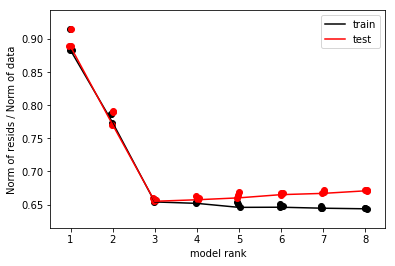

In [11]:
ax = tt.plot_error(results, partition='train',
                   line_kw=dict(c='k', label='train'), scatter_kw=dict(c='k'));
tt.plot_error(results, partition='test', ax=ax,
              line_kw=dict(c='r', label='test'), scatter_kw=dict(c='r'));
plt.legend()